# Chapter 2 - Training Machine Learning Algorithms for Classification

### Overview


- [Artificial neurons - a brief glimpse into the early history
of machine learning](#Artificial-neurons-a-brief-glimpse-into-the-early-history-of-machine-learning)
- [Implementing a perceptron learning algorithm in Python](#Implementing-a-perceptron-learning-algorithm-in-Python)
    - [Training a perceptron model on the Iris dataset](#Training-a-perceptron-model-on-the-Iris-dataset)
- [Adaptive linear neurons and the convergence of learning](#Adaptive-linear-neurons-and-the-convergence-of-learning)
    - [Minimizing cost functions with gradient descent](#Minimizing-cost-functions-with-gradient-descent)
    - [Implementing an Adaptive Linear Neuron in Python](#Implementing-an-Adaptive-Linear-Neuron-in-Python)
    - [Large scale machine learning and stochastic gradient descent](#Large-scale-machine-learning-and-stochastic-gradient-descent)
- [Summary](#Summary)

In [1]:
from IPython.display import Image

# Artificial neurons - a brief glimpse into the early history of machine learning

### MCP Neuron [McCullock & Pitts, 1943]

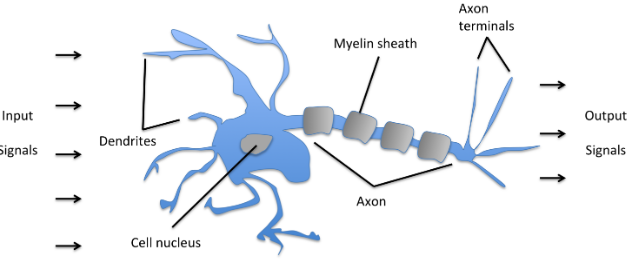

In [2]:
Image(filename='./images/02_01.png', width=500)

### Perceptron [Rosenblatt, 1957]

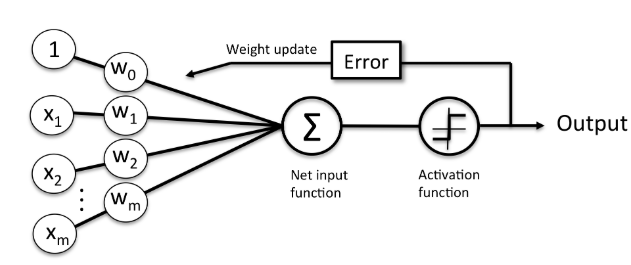

In [3]:
Image(filename='./images/02_04.png', width=600)

#### Linear prediction 
$$z = w^T x = \sum_{i=0}^m w_i x_i$$
Note that $x_0 = 1$

#### Activation function $\phi(z)$ 
: converts a linear prediction to a nonlinear output

In perceptron, the activation function is *a simple unit step function*, aka *Heaviside step function*:

$$
  \phi(z) = \begin{cases} 1 & \text{if $z \ge \theta$} \\ -1 & \text{otherwise} \end{cases}
$$

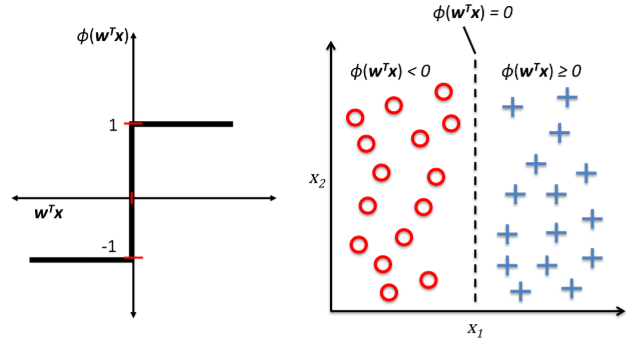

In [4]:
Image(filename='./images/02_02.png', width=500)

### Perceptron Algorithm

1. Intialize all weights to zero or some small random numbers
2. For each training sample $x^{(i)}$, perform the following:

    2.1. Compute the prediction output $\hat y^{(i)} = \phi(w^T x^{(i)})$
    
    2.2. Update the weights:
    
$$
          w_j = w_j + \Delta w_j, \;\; \Delta w_j = \eta (y^{(i)} - \hat y^{(i)} ) x_j^{(i)}, \;\; j=1,2,\dots, m \quad \text{[Perceptron Learning Rule]}
$$
    
* Here, $y^{(i)}$ is the true class label, and $\hat y^{(i)}$ is the predicted class label
* $ \eta \in (0,1]$ is the *learning rate*

#### Convergence of the perceptron algorithm
: only guaranteed if 
  - (i) the two classes are linearly separable, and 
  - (ii) the learning rate is sufficiently small.
  
Otherwise, we set a maximum number of passes over the training dataset (*epochs*)

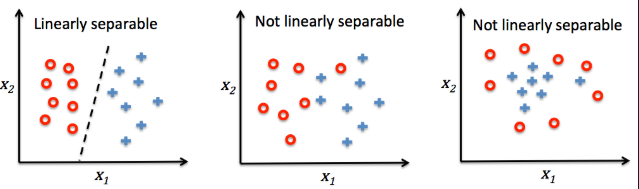

In [5]:
Image(filename='./images/02_03.png', width=600)

<br>
<br>

# Implementing a perceptron learning algorithm in Python

In [6]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<br>
<br>

## Training a perceptron model on the Iris dataset

- Classification: Setosa vs. Versicolor
- Features: sepal length, petal length (not 4, for visualization)

#### Using binary classifier to multi-class classification (One-vs-all, OvA)

- Train one classifier per class, where the particular class is treated as the positive class, and all other classes are considered as the negative class
- Choose the label associated with the largest absolute net input value

### Reading-in the Iris data

In [7]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
#df.head()
df.tail()
#df.iloc[0:100].values

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
#print(df)

- First 50 samples: Iris-Setosa
- Next 50 samples: Iris-Versicolor

In [0]:
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
X = df.iloc[0:100, [0, 2]].values
print(X)

<br>
<br>

### Plotting the Iris data

RangeIndex(start=0, stop=150, step=1)


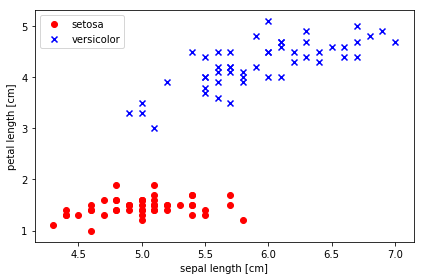

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Training the perceptron model

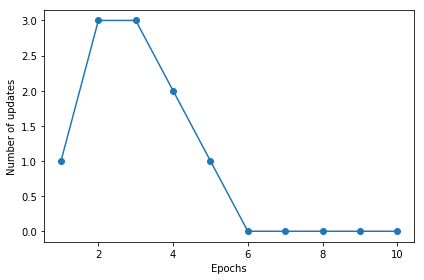

In [26]:
ppn = Perceptron(eta=0.1, n_iter=10, shuffle=False)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

<br>
<br>

### A function for plotting decision regions

In [0]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


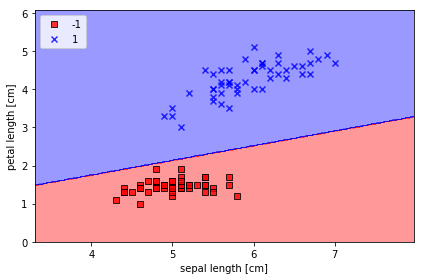

In [28]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

# ADAptive LInear Neurons (ADALINE)
# [B. Widrow & T. Hoff, 1960]

- Introduces the concept of the "cost (loss)" function into the perceptron
- Main difference: $\phi(w^T x) = w^T x$ (identity function)

The objective function of Adaline is the sum of squares (SSE):
$$
 J(w) = \frac12  \sum_{i=1}^n \big( y^{(i)} - \phi(z^{(i)}) \big)^2 
$$

$n$: size of the training set

## Minimizing cost functions with gradient descent

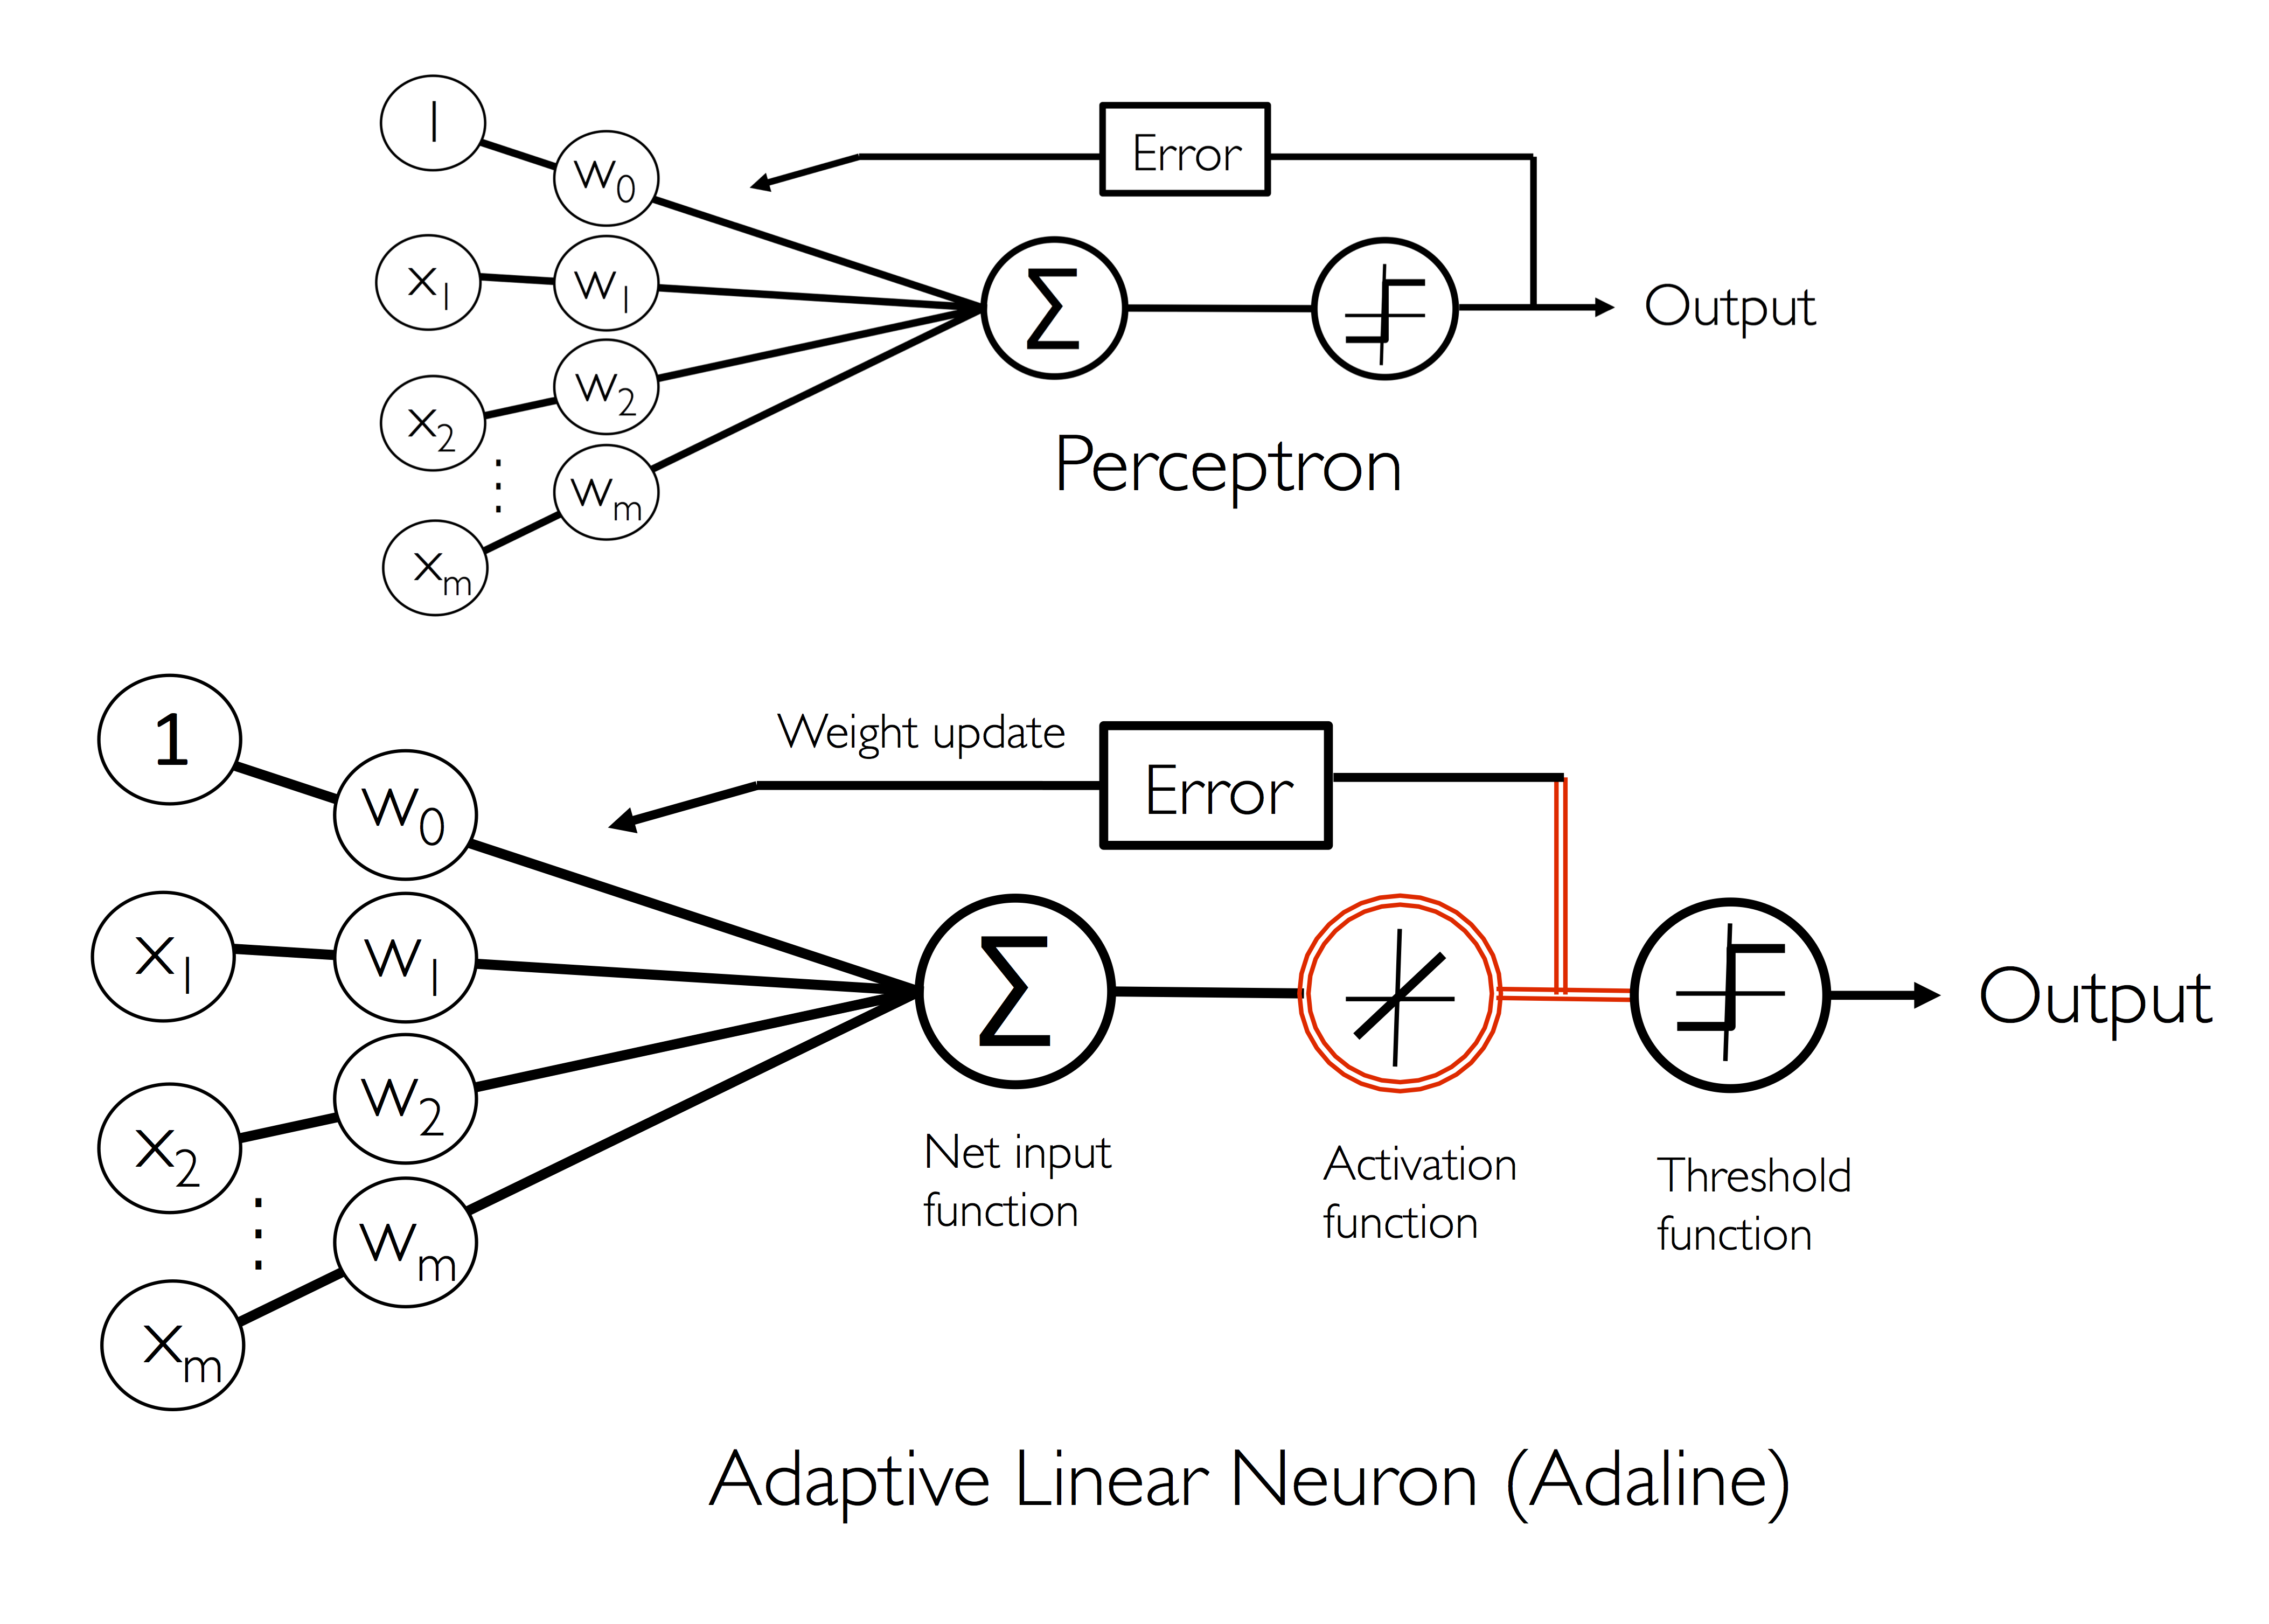

In [0]:
Image(filename='./images/02_09.png', width=600)

### Gradient Descent Algorithm

- $w = w + \Delta w$
- $\Delta w = - \eta \nabla J(w)$

$$
 J(w) = \frac12 \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)^2
$$

$$z = w^T x $$

$$
\begin{align*}
 [\nabla J(w)]_j &= \frac{\partial J(w)}{\partial w_j} \\
  &= \frac{\partial}{\partial w_j} \frac12 \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)^2 \\
  &= \frac12 \sum_i 2 \big( y^{(i)} - \phi(z^{(i)}) \big) \frac{\partial}{\partial w_j} ( y^{(i)} - \phi(z^{(i)}) \big) \\
  &= - \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)x_j^{(i)}
\end{align*}
$$

- $[\Delta w]_j = \eta \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big)x_j^{(i)}$

Differences to the original perceptron:
- $\phi(z)$ is a real number in Adaline, not an integer class label
- The weigth update is calculated based on all training samples (we often call this as "batch" learning)

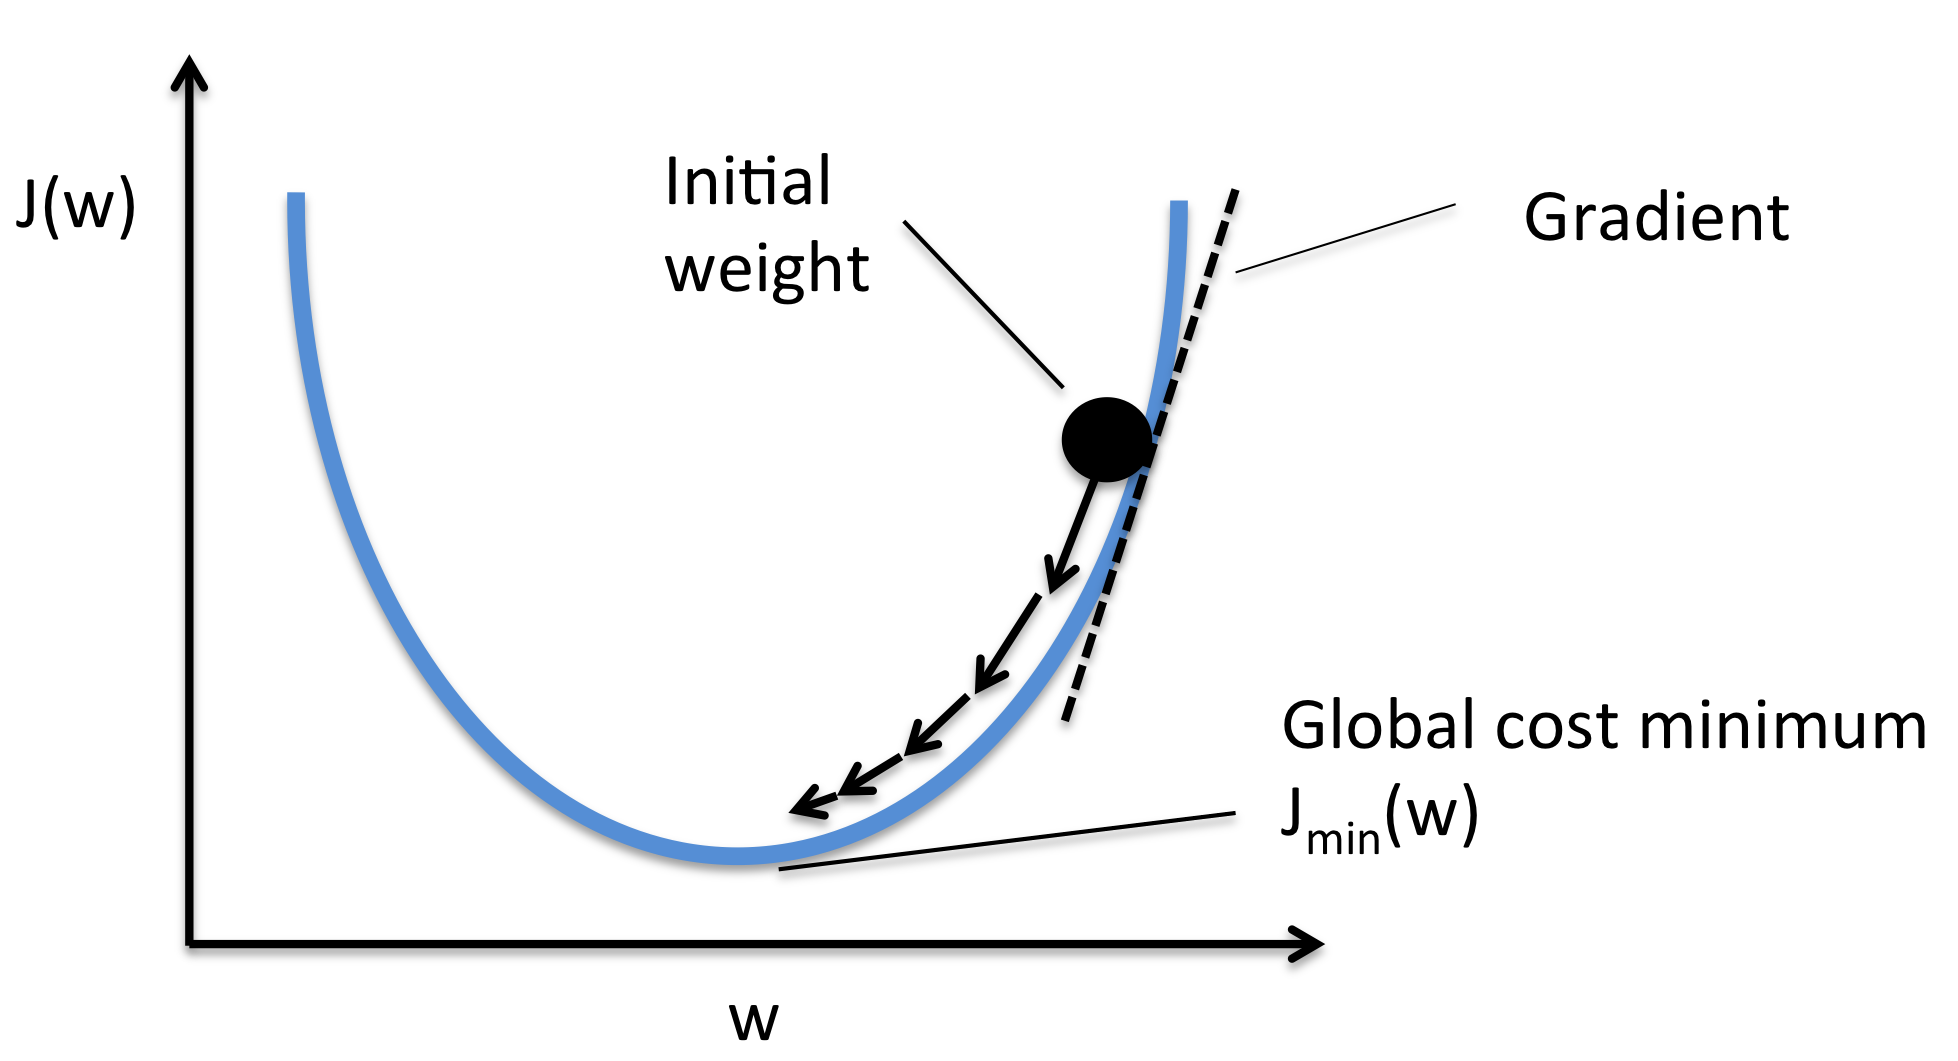

In [0]:
Image(filename='./images/02_10.png', width=500)

<br>
<br>

## Implementing an adaptive linear neuron in Python

In [0]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

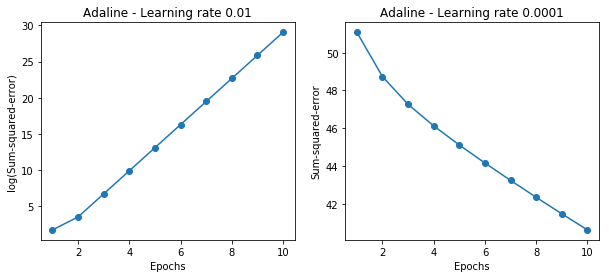

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

Above: (left) learning rate is too large (overshooting the minimizer), (right) too small 

<br>
<br>

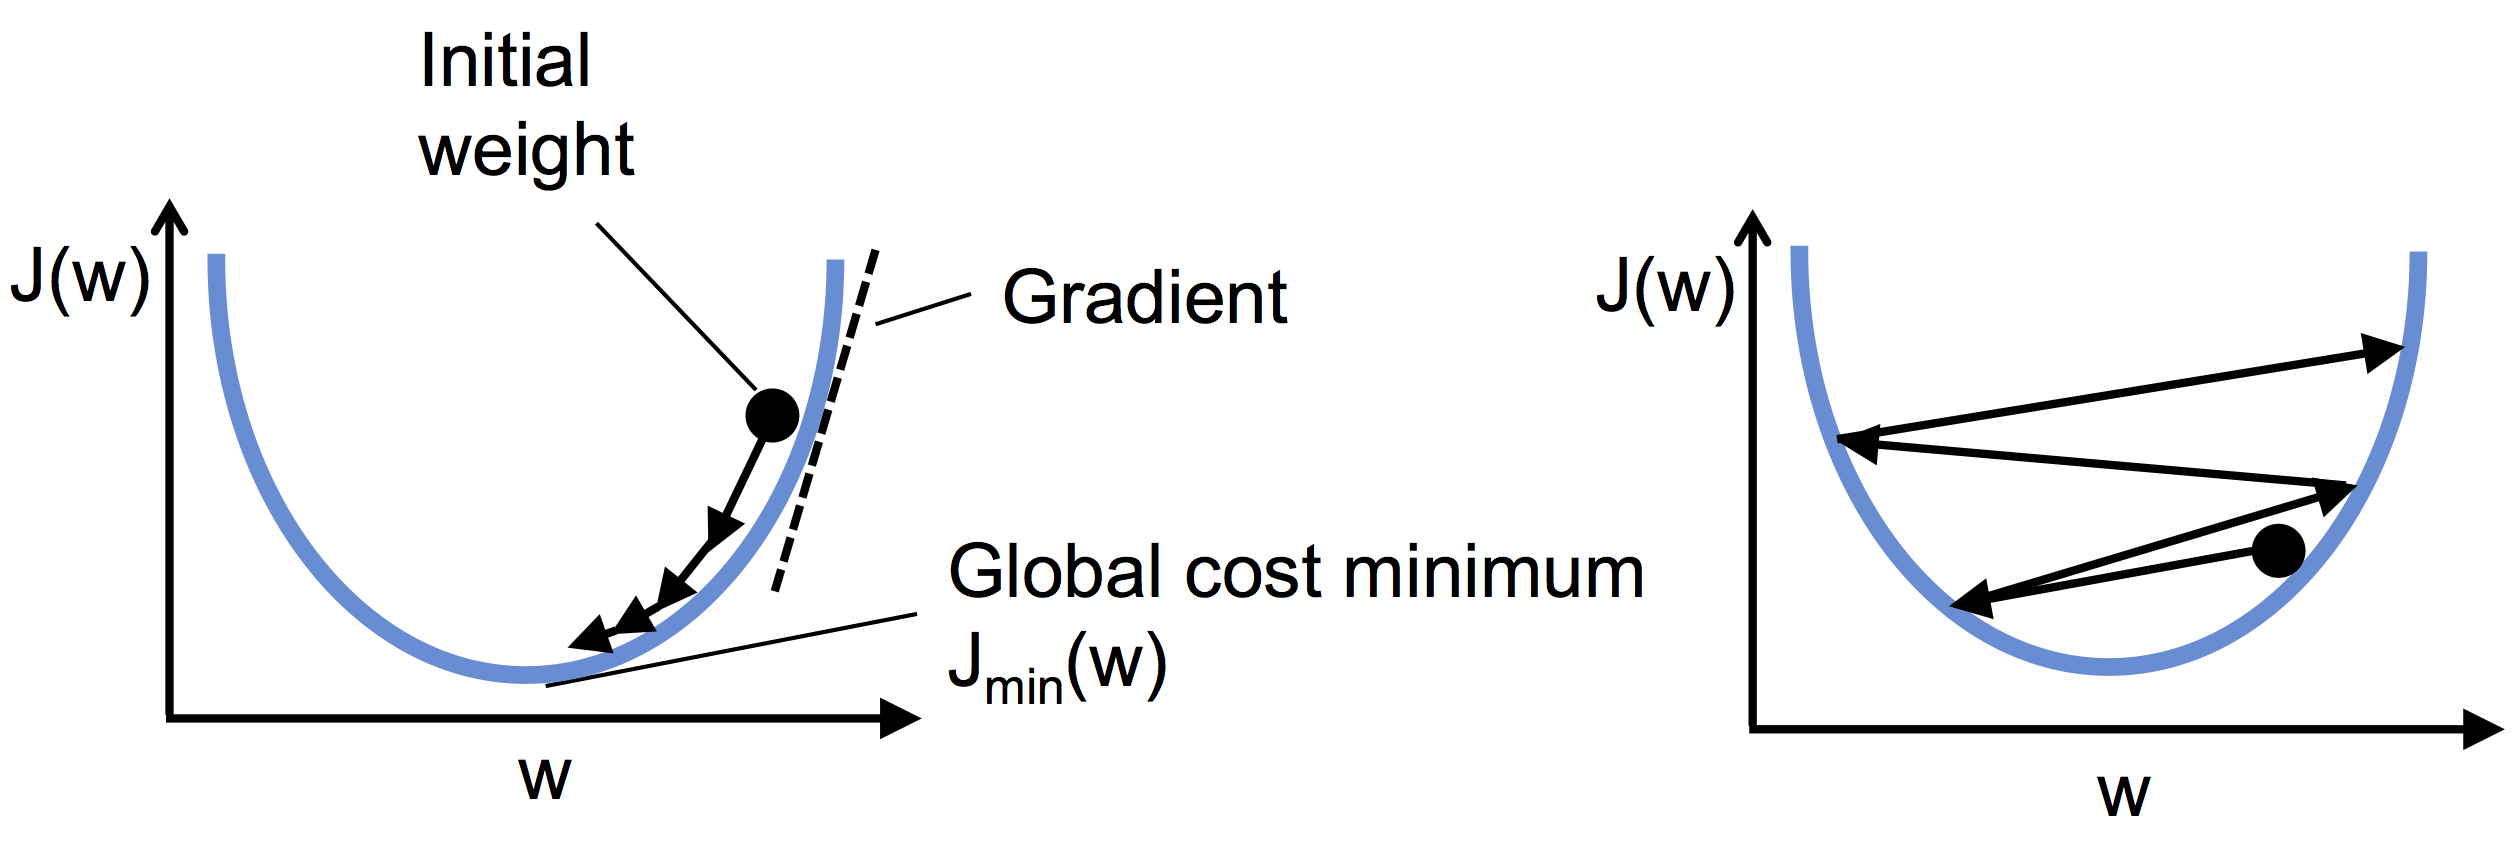

In [0]:
Image(filename='./images/02_12.png', width=700)

This behavior of GD is often caused by bad scaling of the input features.

## Improving gradient descent through feature scaling

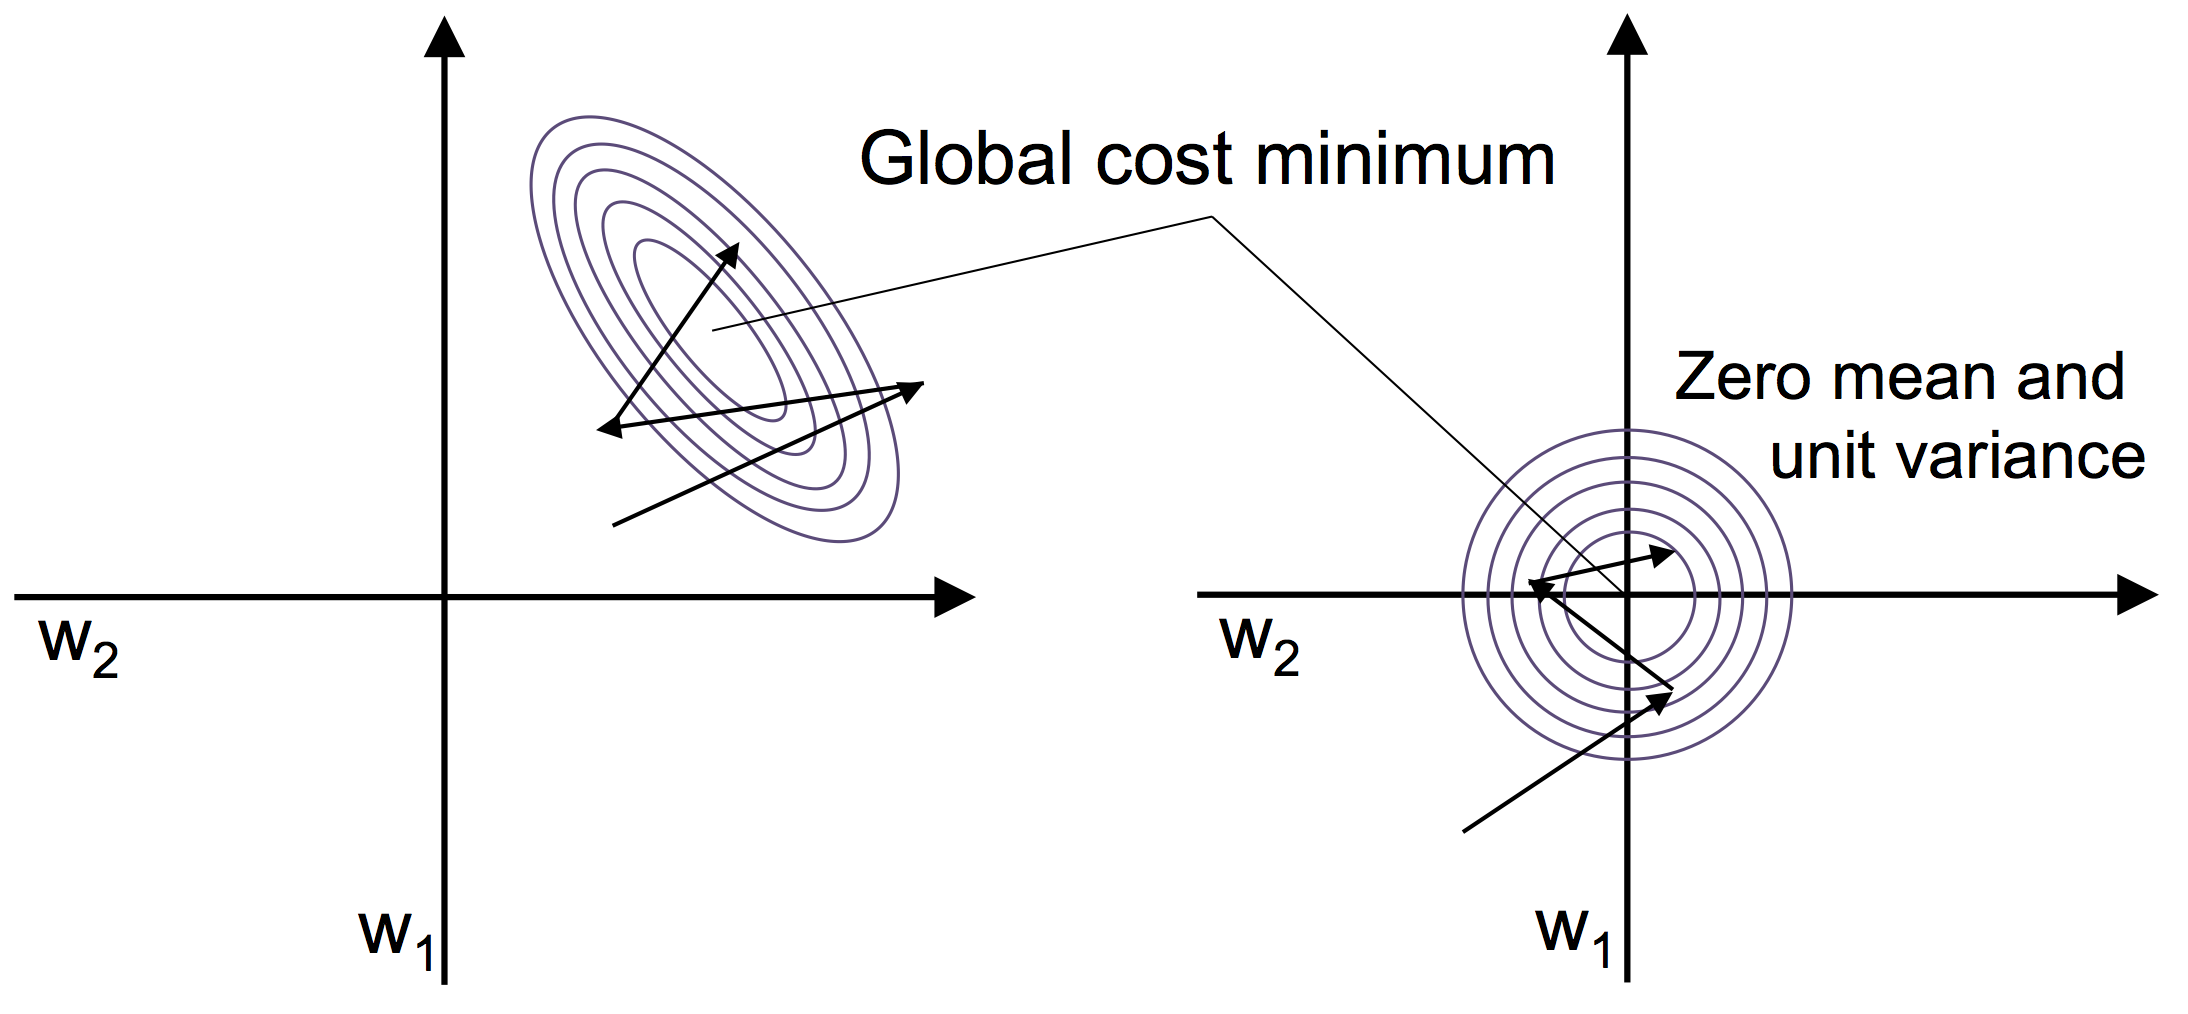

In [0]:
Image(filename='./images/02_13.png', width=700)

### Standardization

$$
   x_j' = \frac{x_j - \mu_j}{\sigma_j}
$$

In [0]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [0]:
X[:, 0].std()

0.63848179300587748

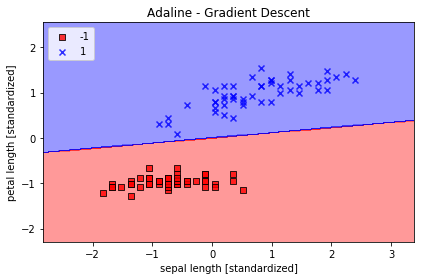

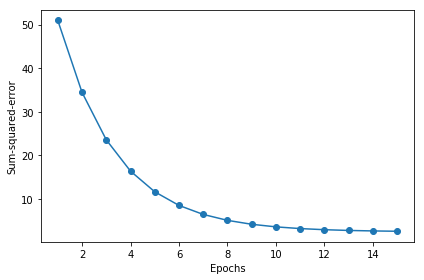

In [0]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## Large scale machine learning and stochastic gradient descent

Stochastic Gradient Descent (SGD):
- An optimization technique for online training
- Instead of the gradient, e.g.
$$
 \Delta w = \eta \sum_i \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

- Use a *stochastic* gradient built on a single random sample,
$$
 \eta \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

- or a *mini-batch* stochastic gradient built on a small subsample of the training data:
$$
  \eta \frac{1}{|B|} \sum_{i \in B} \big( y^{(i)} - \phi(z^{(i)}) \big) x^{(i)}, 
$$

In SGD, we often use decreasing learning rate:
- $\eta_k = O(\frac{1}{k})$
- $\eta_k = O(\frac{1}{\sqrt{k}})$

In [0]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

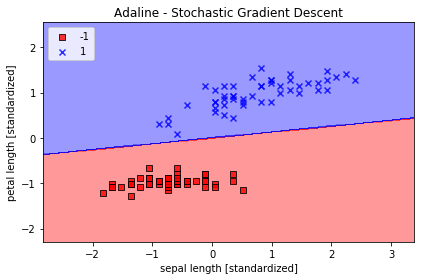

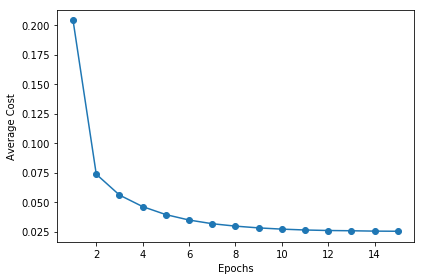

In [0]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

<br>
<br>

# Summary

- Perceptron, a basic linear classifier 
- Training via gradient descent
- Batch vs. online training
- Implementation in Python